<h1><p style="text-align: center;"><strong>Studying superconductor materials</strong></h1>

<div style="border-top: 2px;border-bottom: 2px;border-style: solid;border-color: #003366;padding: 20px;">
<h3><p style="text-align: center;"><strong>Table of Contents</strong></h3>
<ol>
<li><a href="#intro"> Introduction </a></li> 
<li><a href="#dataset"> Dataset </a></li> 
<li><a href="#q1"> Study as function of critical temperature</a></li>    
<li><a href="#q2"> Is the YBCO familiy one of the most promising HTS families?</a></li> 
<li><a href="#q3"> Correlation between critical temperature and Electron Affinity in YBCO family?</a></li> 
<li><a href="#q4"> Study as function of number of elements</a></li> 
<li><a href="#conclusions"> Conclusions</a></li> 
</ol>
</div>

<div class="alert alert-success h1" role="alert">
    <b>Introduction</b>
<a class="anchor" id="intro"></a> </div>

A superconductor material shows a vanishing electrical resistance and its magnetic flux fields are expelled from the material. 
Unlike an ordinary metallic conductor, whose resistance decreases gradually as its temperature is lowered even down to near absolute zero, a superconductor has a characteristic critical temperature, $T_c$, below which the resistance drops abruptly to zero. Superconductors can be classified in accordance with several criteria that depend on physical properties, current understanding, and the expense of cooling them or their material. 

### By their critical temperature
* Low-temperature superconductors, or LTS: those whose critical temperature is below 77 K.
* High-temperature superconductors, or HTS: those whose critical temperature is above 77 K.




<div align="center">
<figure>   
    <h1>Timeline of superconducting materials</h1>
    <img src="Timeline.png" width="1000" height="1000">
    <figcaption> <b> Timeline of superconducting materials. Colors represent different classes of materials:   BCS (dark green circle)   Heavy-fermions-based (light green star)   Cuprate (blue diamond)   Buckminsterfullerene-based (purple inverted triangle)   Carbon-allotrope (red triangle)   Iron-pnictogen-based (orange square)   Strontium_ruthenate (grey pentagon)   Nickel-based (pink six-point star)</b> </figcaption>
</figure>
</div>

### By material constituents and structure
* Some pure elements, such as mercury, Hg or fullerene C$_{60}$. 
* Binary alloys, such as NbTi. 
* Ceramics, where we find the famous YBCO family, or Iron-based superconductors

<div align="center">
<figure>   
    <img src="Ybco.jpg" width="400" height="400">
    <div align="center">
    <figcaption> <b> Unit cell for the Cuprate of Barium and Yttrium (YBCO) </b></figcaption>
        </div>
</figure>
</div>

<div class="alert alert-success h1" role="alert">
    <b>Dataset</b>
<a class="anchor" id="dataset"></a> </div>

## Dataset information

There are two files: (1) train.csv contains 81 features extracted from 21263 superconductors along with the critical temperature in the 82nd column, (2) unique_m.csv contains the chemical formula broken up for all the 21263 superconductors from the train.csv file. The last two columns have the critical temperature and chemical formula.

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

In [2]:
df=pd.read_csv('train.csv', sep=',')
df2=pd.read_csv('unique_m.csv', sep=',')

In [3]:
properties=df.copy()
elements=df2.copy()
properties

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
elements.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
properties.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

From all the columns, we left out the ones containing Weighted mean, Weighted geometric mean, entropy, etc. We select only the mean values of each variable. Hence, we select the critical temperature $T_c$, the mean atomic mass, $A$, mean thermal conductivity, $\kappa$, mean electron affinity, $EAF$, mean density, $\rho$, mean fusion heat, $\Delta H_f$, and the mean Valence.

In [6]:
properties=properties[['critical_temp','mean_atomic_mass','mean_ThermalConductivity','mean_ElectronAffinity','mean_Density','mean_FusionHeat', 'mean_Valence']]

In [7]:
properties.sort_values(by=['critical_temp'])

,critical_temp,mean_atomic_mass,mean_ThermalConductivity,mean_ElectronAffinity,mean_Density,mean_FusionHeat,mean_Valence
14804,0.000210,102.905500,150.000000,111.200000,12450.000000,21.700000,6.000000
14803,0.000325,102.905500,150.000000,111.200000,12450.000000,21.700000,6.000000
17374,0.000400,6.941000,85.000000,61.100000,535.000000,3.000000,1.000000
14807,0.000500,155.892284,201.000000,127.350000,13305.000000,7.880000,4.000000
14806,0.000620,195.084000,71.000000,206.800000,21450.000000,20.000000,6.000000
...,...,...,...,...,...,...,...
1343,136.000000,106.454829,100.289511,72.400000,5851.204143,9.318857,3.142857
19039,137.400000,110.320617,112.054430,50.653333,6567.571500,6.058667,2.166667
5200,143.000000,110.790067,110.221097,53.303333,6482.571500,6.153667,2.333333
3985,143.000000,110.790067,110.221097,53.303333,6482.571500,6.153667,2.333333


In [8]:
properties.isna().sum()

critical_temp               0
mean_atomic_mass            0
mean_ThermalConductivity    0
mean_ElectronAffinity       0
mean_Density                0
mean_FusionHeat             0
mean_Valence                0
dtype: int64

In [9]:
properties.describe().T

,count,mean,std,min,25%,50%,75%,max
critical_temp,21263.0,34.421219,34.254362,0.00021,5.365000,20.000000,63.000000,185.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.94100,72.458076,84.922750,100.404410,208.9804
mean_ThermalConductivity,21263.0,89.706911,38.517485,0.02658,61.000000,96.504430,111.005316,332.5000
mean_ElectronAffinity,21263.0,76.879751,27.701890,1.50000,62.090000,73.100000,85.504167,326.1000
mean_Density,21263.0,6111.465214,2846.785185,1.42900,4513.500000,5329.085800,6728.000000,22590.0000
mean_FusionHeat,21263.0,14.296113,11.300188,0.22200,7.588667,9.304400,17.114444,105.0000
mean_Valence,21263.0,3.198228,1.044611,1.00000,2.333333,2.833333,4.000000,7.0000


In [10]:
cols=[i for i in elements.columns if i not in ["critical_temp","material"]]
for col in cols:
    elements[col]=elements[col].apply(np.float64)
elements=elements.replace(0.0, np.nan)
elements['Number of elements']=elements.count(axis=1)-2
elements=elements.replace(np.nan, 0.0)
elements=elements.drop(columns=['critical_temp'])
elements

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material,Number of elements
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.2La1.8Cu1O4,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Ag0.1Cu0.9O4,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Cu1O4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.15La1.85Cu1O4,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.3La1.7Cu1O4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tm0.84Lu0.16Fe3Si5,4
21259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Tl1Ba2Ca3Cu4O11,5
21260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nb0.8Pd0.2,2
21261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nb0.69Pd0.31,2


In [11]:
result = pd.merge(properties, elements, left_index=True, right_index=True, how="inner")
result

,critical_temp,mean_atomic_mass,mean_ThermalConductivity,mean_ElectronAffinity,mean_Density,mean_FusionHeat,mean_Valence,H,He,Li,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material,Number of elements
0,29.00,88.944468,107.756645,81.837500,4654.35725,6.905500,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.2La1.8Cu1O4,4
1,26.00,92.729214,172.205316,90.890000,5821.48580,7.784400,2.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Ag0.1Cu0.9O4,5
2,19.00,88.944468,107.756645,81.837500,4654.35725,6.905500,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Cu1O4,4
3,22.00,88.944468,107.756645,81.837500,4654.35725,6.905500,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.15La1.85Cu1O4,4
4,23.00,88.944468,107.756645,81.837500,4654.35725,6.905500,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.3La1.7Cu1O4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,2.44,106.957877,65.500000,63.825000,7341.25000,25.700000,3.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tm0.84Lu0.16Fe3Si5,4
21259,122.10,92.266740,132.805316,60.484000,5174.28580,6.812400,2.20,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Tl1Ba2Ca3Cu4O11,5
21260,1.98,99.663190,62.500000,71.400000,10296.50000,21.750000,4.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nb0.8Pd0.2,2
21261,1.84,99.663190,62.500000,71.400000,10296.50000,21.750000,4.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nb0.69Pd0.31,2


Finally we have a dataframe with the phyisical properties and the chemical information on  it. Let's study it:

<div class="alert alert-success h1" role="alert">
    <b>Study as function of critical temperature </b>
<a class="anchor" id="q1"></a> </div>

We study the different behavious between low-temperature superconductors (LTS) and high-temperature superconductors(HTS). We will use the new standard, that is consider that if the critical temperature, $T_c$, is higher than the nitrogen liquid temperature, 77K, the superconductor is HTS. 

In [12]:
LTS=result[result['critical_temp']<=77]
HTS=result[result['critical_temp']>77]

Text(0.5, 0, 'Critical temperature, K')

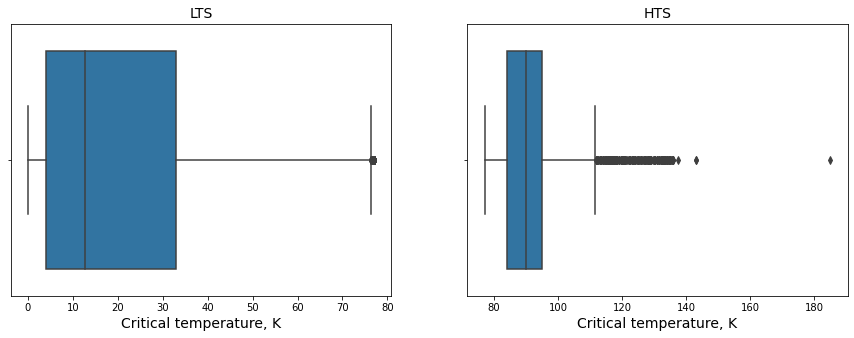

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(x=LTS['critical_temp'], ax=axs[0])
axs[0].set_title('LTS', fontsize=14)
axs[0].set_xlabel('Critical temperature, K', fontsize=14)
sns.boxplot(x=HTS['critical_temp'], ax=axs[1])
axs[1].set_title('HTS', fontsize=14)
axs[1].set_xlabel('Critical temperature, K', fontsize=14)

In [14]:
#Removing outliers of HTS: 
LTS=LTS[LTS['critical_temp'].between(LTS['critical_temp'].quantile(.0), LTS['critical_temp'].quantile(.85))]
HTS=HTS[HTS['critical_temp'].between(HTS['critical_temp'].quantile(.0), HTS['critical_temp'].quantile(.85))]

Text(0.5, 0, 'Critical temperature, K')

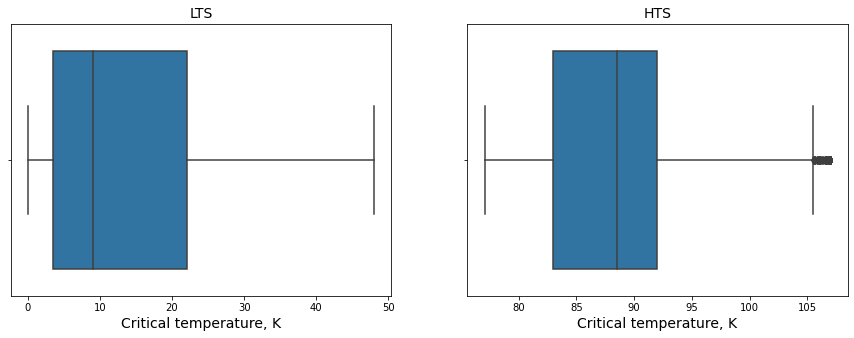

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(x=LTS['critical_temp'], ax=axs[0])
axs[0].set_title('LTS', fontsize=14)
axs[0].set_xlabel('Critical temperature, K', fontsize=14)
sns.boxplot(x=HTS['critical_temp'], ax=axs[1])
axs[1].set_title('HTS', fontsize=14)
axs[1].set_xlabel('Critical temperature, K', fontsize=14)

Text(0, 0.5, 'Ordered quantiles')

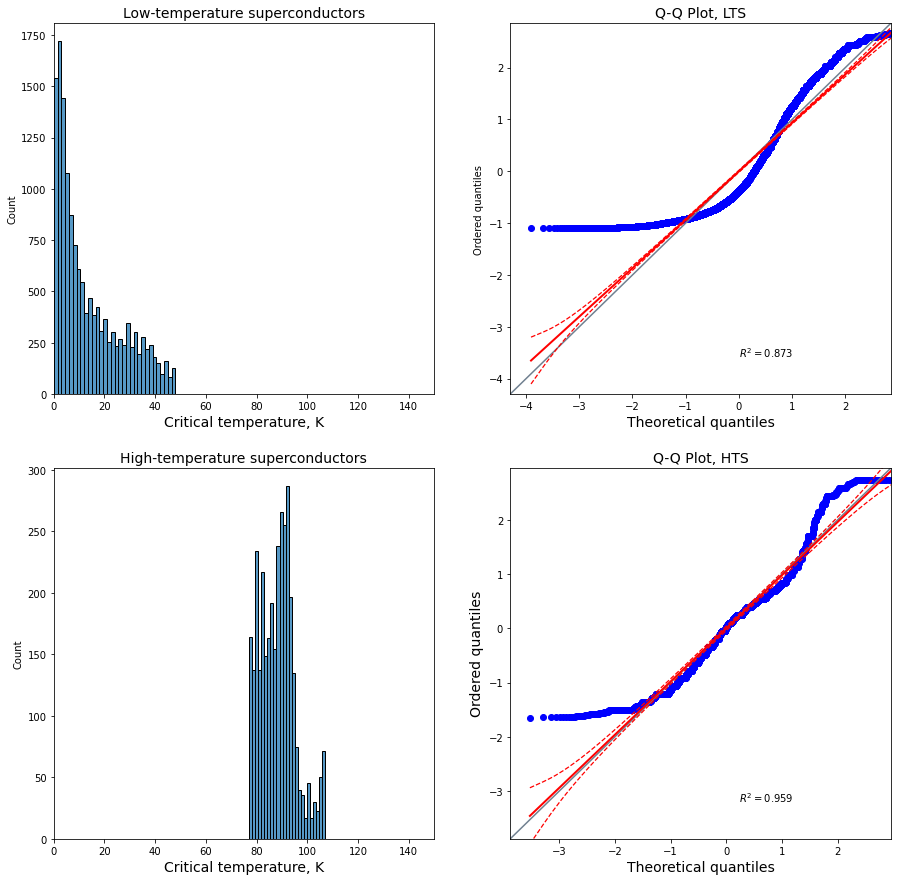

In [16]:
#Distribution and Q-Q plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.histplot(data=LTS, x='critical_temp',ax=axs[0][0])
axs[0][0].set_title('Low-temperature superconductors',fontsize=14)
axs[0][0].set_xlabel('Critical temperature, K',fontsize=14)
axs[0][0].set_xlim(xmin=0.0, xmax=150)
sns.histplot(data=HTS, x='critical_temp', ax=axs[1][0])
axs[1][0].set_xlabel('Critical temperature, K', fontsize=14)
axs[1][0].set_title('High-temperature superconductors', fontsize=14)
axs[1][0].set_xlim(xmin=0.0, xmax=150)
pg.qqplot(LTS['critical_temp'] , dist='norm', ax=axs[0, 1])
axs[0][1].set_title('Q-Q Plot, LTS', fontsize=14)
axs[0][1].set_xlabel('Theoretical quantiles', fontsize=14)
axs[1][1].set_ylabel('Ordered quantiles', fontsize=14)
pg.qqplot(HTS['critical_temp'] , dist='norm', ax=axs[1, 1])
axs[1][1].set_title('Q-Q Plot, HTS', fontsize=14)
axs[1][1].set_xlabel('Theoretical quantiles', fontsize=14)
axs[1][1].set_ylabel('Ordered quantiles', fontsize=14)

In [17]:
print('Kursotis for LTS:', stats.kurtosis(LTS['critical_temp']))
print('Skewness for LTS:', stats.skew(LTS['critical_temp']))
print('Kursotis for HTS:', stats.kurtosis(HTS['critical_temp']))
print('Skewness for HTS:', stats.skew(HTS['critical_temp']))

Kursotis for LTS: -0.30917091812199526
Skewness for LTS: 0.9193082005707064
Kursotis for HTS: 0.11288626195447282
Skewness for HTS: 0.5664559832042433


<div class="alert alert-warning" role="alert">
    <h2> Hypothesis contrast</h2>
</div>

The Shapiro-Wilk test and the D'Agostino's K-squared test are two of the most widely statistical tests used to analize the normality of a dataset. In both cases, the null hypothesis considers that the data comes from a normal distribution.


The p-value of these tests indicates the probability of obtaining data like those observed,  if they really came from a population with a normal distribution with the same mean and deviation as these. Hence, if the p-value is lower than a the confident interval value, normaly taken as 0.05 (95%), it is considered then that there is enough evidences to refuse the null hypothesis, i.e., refuse the normality of the data. 

The Shapiro-Wilk test is discouraged from using when the dataset is big (>50), due to his elevate sensitivity to small deviations from the normality. Hence, we will use the D'Agostino's K-squared test, with null and alternative hypothesis: 

$$
\begin{align*}
H_0:T_{c,LTS}=N(\mu,\sigma^2) \qquad H_0:T_{c,HTS}=N(\mu,\sigma^2) \\
H_a:T_{c,LTS}\neq N(\mu,\sigma^2) \qquad H_a:T_{c,HTS}\neq N(\mu,\sigma^2)
\end{align*}
$$

In [18]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(LTS['critical_temp'])
print(f"Statistic for LTS = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(HTS['critical_temp'])
print(f"Statistic for HTS = {k2}, p-value = {p_value}")

Statistic for LTS = 1624.3596797116509, p-value = 0.0
Statistic for HTS = 157.68423819856, p-value = 5.745168010448136e-35


As the p-value is much lower than 0.05, we reject the null hypothesis and conclude that the critical temperature distribution of the LTS and HTS group do not follow a normal distribution.

<div class="alert alert-success h1" role="alert">
    <b>Is the YBCO familiy one of the most promising HTS families? </b>
 <a class="anchor" id="q2"></a></div>

Yttrium barium copper oxide (YBCO) is a family of crystalline chemical compounds that display high-temperature superconductivity; it includes the first material ever discovered to become superconducting above the boiling point of liquid nitrogen (77 K) at about 93 K. 

In [19]:
YBCO=result[(result['Cu']!=0.0)&(result['Y']!=0.0) &(result['Ba']!=0.0)&(result['Cu']!=0.0)&(result['O']!=0.0)&(result['critical_temp']>77)]
YBCO=YBCO[YBCO['material'].str.startswith('Y')]
YBCO[['critical_temp','material']].sort_values(by=['critical_temp'])

,critical_temp,material
20373,77.1,Y1Ba2Cu3O6.8
1284,77.1,Y0.7Ca0.1Pr0.2Ba2Cu3O6.95
4880,77.1,Y1Ba2Cu2.875Co0.125O
1286,77.1,Y0.65Ca0.15Pr0.2Ba2Cu3O6.95
7083,77.1,Y1Ba2Cu0.88Co0.12O7
...,...,...
362,99.0,Y1Ba1.975La0.025Cu3O6.95
363,99.0,Y1Ba1.95La0.05Cu3O6.9
18191,100.1,Y3Ba5Cu8O18
9413,105.0,Y0.2Pr0.3Ca0.5Ba2Cu3O7


Iron-based superconductors contain layers of iron and a pnictogen – such as arsenic or phosphorus – or a chalcogen. This is currently the family with the second highest critical temperature, behind the cuprates (mostly, the YBCO family). Let's try to figure out if the mean critical temperature of this familiy is higher than the mean critical temperature of the Iron-based family.

In [20]:
Iron_family=result[(result['Fe']!=0.0) & ((result['As']!=0.0)|(result['P']!=0.0))]
Iron_family[['critical_temp','material']].sort_values(by=['critical_temp'])

,critical_temp,material
20626,0.2,La1Fe0.985Zn0.015As1F0.08O0.9
20677,0.2,Sm1Fe1As1H0.03O0.97
20029,0.8,Sr1.7Ca0.3V1Fe1As1O3
20630,1.0,La1Fe0.951Zn0.049As1F0.28O0.68
19328,1.6,Sr1Fe1.9Pt0.1As2
...,...,...
20678,55.3,Sm1Fe1As1H0.19O0.81
20492,56.2,Gd1Fe1As1H0.1O0.9
19384,56.4,Sm1Fe1As1F0.5O
19383,57.1,Sm1Fe1As1F0.5O


Text(0.5, 0, 'Critical temperature, K')

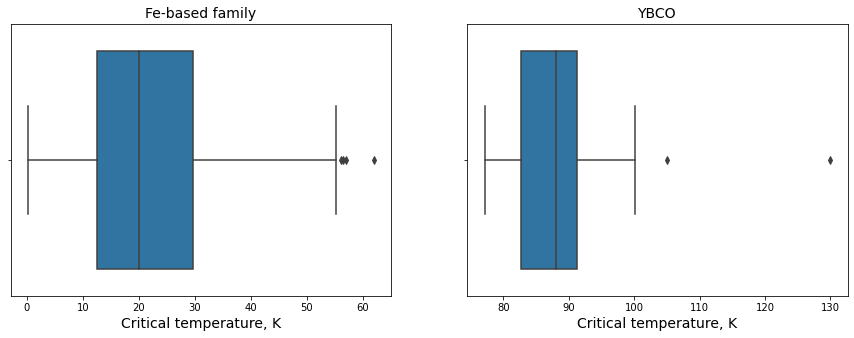

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(x=Iron_family['critical_temp'], ax=axs[0])
axs[0].set_title('Fe-based family', fontsize=14)
axs[0].set_xlabel('Critical temperature, K', fontsize=14)
sns.boxplot(x=YBCO['critical_temp'], ax=axs[1])
axs[1].set_title('YBCO', fontsize=14)
axs[1].set_xlabel('Critical temperature, K', fontsize=14)

In [22]:
#Removing outliers of HTS: 
YBCO=YBCO[YBCO['critical_temp'].between(YBCO['critical_temp'].quantile(.05), YBCO['critical_temp'].quantile(.95))]
Iron_family=Iron_family[Iron_family['critical_temp'].between(Iron_family['critical_temp'].quantile(.05), Iron_family['critical_temp'].quantile(.95))]

Text(0.5, 0, 'Critical temperature, K')

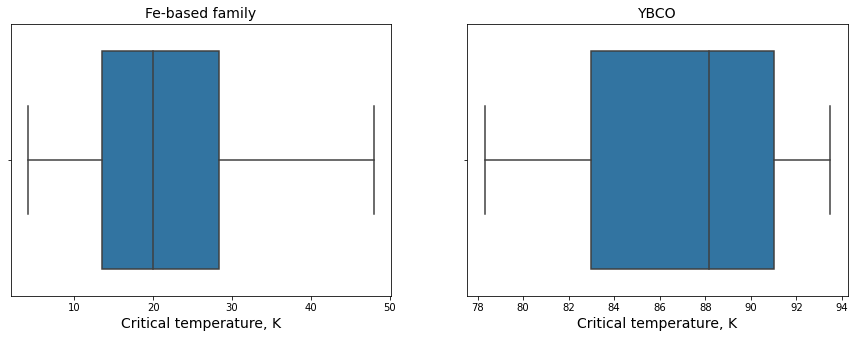

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(x=Iron_family['critical_temp'], ax=axs[0])
axs[0].set_title('Fe-based family', fontsize=14)
axs[0].set_xlabel('Critical temperature, K', fontsize=14)
sns.boxplot(x=YBCO['critical_temp'], ax=axs[1])
axs[1].set_title('YBCO', fontsize=14)
axs[1].set_xlabel('Critical temperature, K', fontsize=14)

Text(0, 0.5, 'Ordered quantiles')

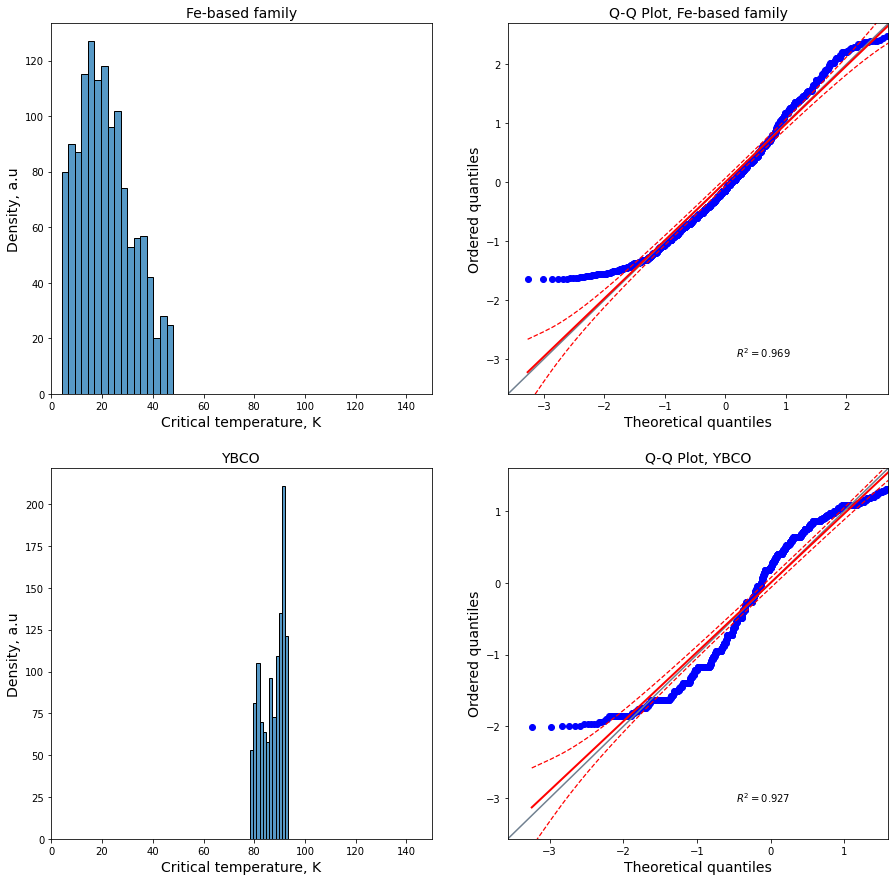

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.histplot(data=Iron_family, x='critical_temp',ax=axs[0][0])
axs[0][0].set_title('Fe-based family', fontsize=14)
axs[0][0].set_xlim(xmin=0.0, xmax=150)
axs[0][0].set_xlabel('Critical temperature, K', fontsize=14)
axs[0][0].set_ylabel('Density, a.u', fontsize=14)
sns.histplot(data=YBCO, x='critical_temp',ax=axs[1][0])
axs[1][0].set_title('YBCO', fontsize=14)
axs[1][0].set_xlabel('Critical temperature, K', fontsize=14)
axs[1][0].set_ylabel('Density, a.u', fontsize=14)
axs[1][0].set_xlim(xmin=0.0, xmax=150)
pg.qqplot(Iron_family['critical_temp'] , dist='norm', ax=axs[0, 1])
axs[0][1].set_title('Q-Q Plot, Fe-based family', fontsize=14)
axs[0][1].set_xlabel('Theoretical quantiles', fontsize=14)
axs[0][1].set_ylabel('Ordered quantiles', fontsize=14)
pg.qqplot(YBCO['critical_temp'] , dist='norm', ax=axs[1, 1])
axs[1][1].set_title('Q-Q Plot, YBCO', fontsize=14)
axs[1][1].set_xlabel('Theoretical quantiles', fontsize=14)
axs[1][1].set_ylabel('Ordered quantiles', fontsize=14)

In [25]:
print('Kursotis for Iron_family:', stats.kurtosis(Iron_family['critical_temp']))
print('Skewness for Iron_family:', stats.skew(Iron_family['critical_temp']))
print('Kursotis for YBCO:', stats.kurtosis(YBCO['critical_temp']))
print('Skewness for YBCO:', stats.skew(YBCO['critical_temp']))

Kursotis for Iron_family: -0.5369541326390479
Skewness for Iron_family: 0.459211734574626
Kursotis for YBCO: -1.1901010700962222
Skewness for YBCO: -0.37701367992947243


<div class="alert alert-warning" role="alert">
    <h2> Hypothesis contrast</h2>
</div>

$$
\begin{align*}
H_0:T_{c,Fe}=N(\mu,\sigma^2) \qquad H_0:T_{c,YBCO}=N(\mu,\sigma^2) \\
H_a:T_{c,Fe}\neq N(\mu,\sigma^2) \qquad H_a:T_{c,YBCO}\neq N(\mu,\sigma^2) 
\end{align*}$$

In [26]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(YBCO['critical_temp'])
print(f"Statistic for YBCO = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(Iron_family['critical_temp'])
print(f"Statistic for Iron_family = {k2}, p-value = {p_value}")

Statistic for YBCO = 845.522341015299, p-value = 2.495493744606204e-184
Statistic for Iron_family = 70.48941164311245, p-value = 4.936495499292033e-16


The YBCO family distribution do not follow a normal distribution as can be concluded from the obtained p-value ($p_{value}\approx0$) and the large skewness.On the other hand, the Fe-based family has a large skewness, and the D'Agostino's K-squared test gave a $p_{value}\approx 0$, which allow us to refuse the null hypothesis, i.e., refuse the normality of the data. Hence, we may conclude that the Fe-based family do not follow a normal-distribution.

In order to compare the mean value fo the two distributions, we need to use a non-parametric test, the U-test of Mann-Whitney-Wilcoxon, U-test from hereafter. The U-test tests the probability that an observation *x* from population *A* exceeds an observation *y* from population *B* is equal to the probability that an observation from population *B* exceeds one from population *A*. That is, that the values of one population do not tend to be greater than those of the other.

In [27]:
# Mann-Whitney U test
# ==============================================================================
mannwhitneyu=pg.mwu(Iron_family['critical_temp'], YBCO['critical_temp'], alternative='less')
mannwhitneyu

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,less,0.0,1.0,1.0


As the p-value is much lower than 0.05, we may reject $H_0$, and conclude that the mean value of the YBCO is larger than the Fe-based family.

<div class="alert alert-success h1" role="alert">
    <b>Correlation between critical temperature and Electron Affinity in YBCO family </b>
 <a class="anchor" id="q3"></a></div>

In [28]:
YBCO

,critical_temp,mean_atomic_mass,mean_ThermalConductivity,mean_ElectronAffinity,mean_Density,mean_FusionHeat,mean_Valence,H,He,Li,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material,Number of elements
16,82.0,69.171250,127.005316,62.5640,3698.68580,8.2524,2.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba1.5Ca0.5Cu3O7,5
32,90.0,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y0.4Ba0.6Cu1O,4
33,90.5,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y0.4Ba0.6Cu1O,4
40,90.0,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba2Cu3O,4
41,90.0,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1.6Ba2.4Cu3O10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,89.5,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba2Cu3O6.98,4
20374,83.2,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba2Cu3O6.8,4
20649,78.5,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba2Cu3O6.8,4
20650,90.5,76.444563,108.756645,77.2375,4235.85725,8.1805,2.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y1Ba2Cu4O6.998,4


Text(0.5, 1.0, 'Critical temperature of YBCO family as function of the electron affinity')

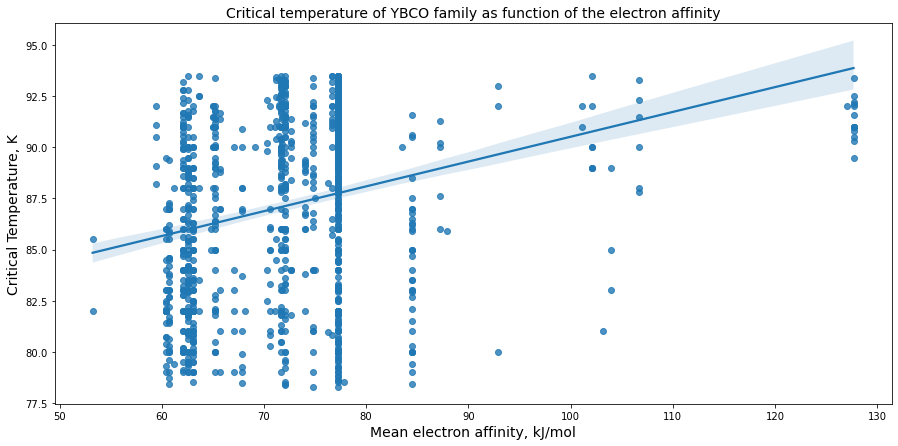

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
sns.regplot(data=YBCO, x='mean_ElectronAffinity',y='critical_temp')
axs.set_ylabel('Critical Temperature, K', fontsize=14)
axs.set_xlabel('Mean electron affinity, kJ/mol', fontsize=14)
axs.set_title('Critical temperature of YBCO family as function of the electron affinity', fontsize=14)

<div class="alert alert-warning" role="alert">
    <h2> Hypothesis contrast</h2>
</div>
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets:

$$
\begin{align*}
H_0:T_c \not \propto EAF\\
H_a:T_c\propto EAF
\end{align*}
$$

In [30]:
#  Spearman correlation
# ==============================================================================
Spearman= pg.corr(YBCO['mean_ElectronAffinity'], YBCO['critical_temp'], method='spearman')
Spearman

,n,r,CI95%,p-val,power
spearman,1176,0.304006,"[0.25, 0.36]",1.442548e-26,1.0


The statistical test show a moderate lineal correlation, $r\approx0.30$, with clear statistical evidences that the observed relationship between the $EAF$ and the $T_c$ is not due to a random effect ($p_{value}\approx 0$)


<div class="alert alert-success h1" role="alert">
    <b>Study as function of number of elements </b>
 <a class="anchor" id="Q4"></a></div>

In [31]:
mbitri=result[result['Number of elements']<4]
tetra_=result[np.logical_and(result['Number of elements']>3,result['Number of elements']<7)]
complex_=result[result['Number of elements']>7]

Text(0.5, 0, 'Number of elements')

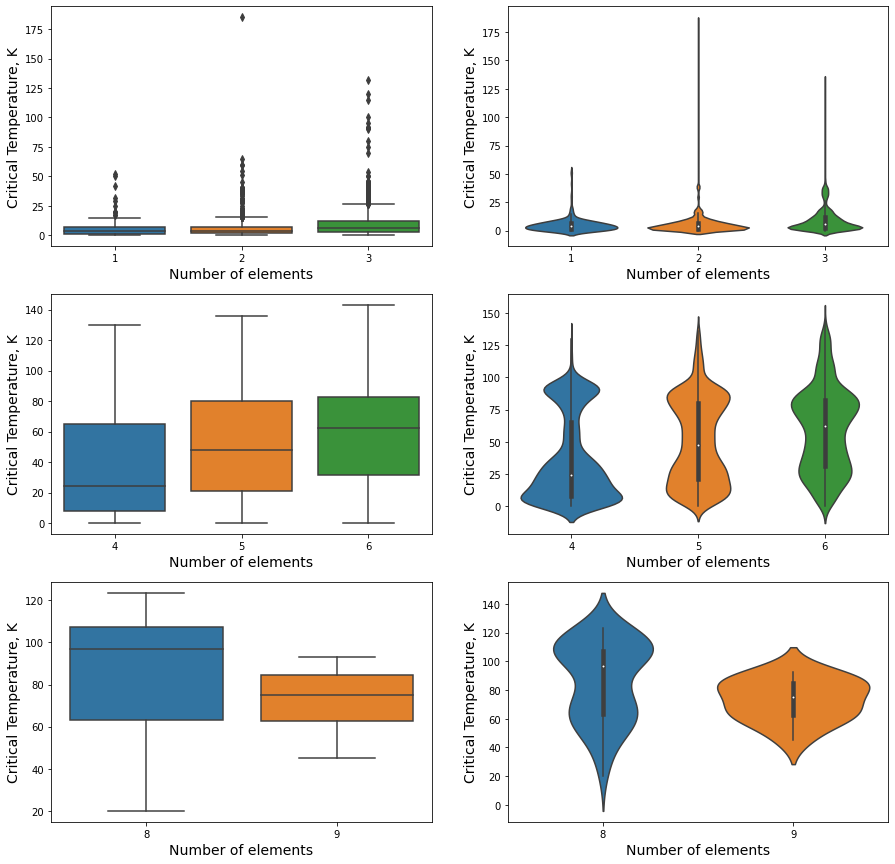

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
sns.boxplot(x='Number of elements', y='critical_temp', data=mbitri, ax=axs[0][0])
axs[0][0].set_ylabel('Critical Temperature, K', fontsize=14)
axs[0][0].set_xlabel('Number of elements', fontsize=14)
sns.violinplot(x='Number of elements', y='critical_temp', data=mbitri, ax=axs[0][1])
axs[0][1].set_ylabel('Critical Temperature, K', fontsize=14)
axs[0][1].set_xlabel('Number of elements', fontsize=14)
sns.boxplot(x='Number of elements', y='critical_temp', data=tetra_, ax=axs[1][0])
axs[1][0].set_ylabel('Critical Temperature, K', fontsize=14)
axs[1][0].set_xlabel('Number of elements', fontsize=14)
sns.violinplot(x='Number of elements', y='critical_temp', data=tetra_, ax=axs[1][1])
axs[1][1].set_ylabel('Critical Temperature, K', fontsize=14)
axs[1][1].set_xlabel('Number of elements', fontsize=14)
sns.boxplot(x='Number of elements', y='critical_temp', data=complex_, ax=axs[2][0])
axs[2][0].set_ylabel('Critical Temperature, K', fontsize=14)
axs[2][0].set_xlabel('Number of elements', fontsize=14)
sns.violinplot(x='Number of elements', y='critical_temp', data=complex_, ax=axs[2][1])
axs[2][1].set_ylabel('Critical Temperature, K', fontsize=14)
axs[2][1].set_xlabel('Number of elements', fontsize=14)

The boxplots and violinplots clearly indicates the following features:
1. The critical temperature increases with the number of elements, peaking the mean critical temperature for 8 elements.
2. The ratio between HTS and LTS increases as the number of elements increases
3. The group with 1,2 and 3 elements, show a similiar interquartil range (IQR), range,  and distribution. 

Hence, we will try to figure out if the mean $T_c$ is the same for superconductors with 1, 2 and 3 elements.

Text(0.5, 1.0, 'Density distribution for pure elements, binary compounds, and ternary compounds')

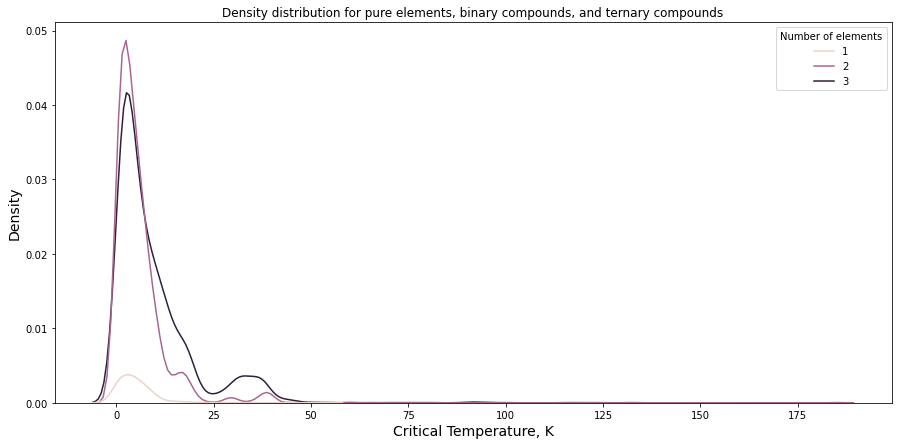

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
sns.kdeplot(data=mbitri, x='critical_temp', hue='Number of elements')
axs.set_xlabel('Critical Temperature, K', fontsize=14)
axs.set_ylabel('Density', fontsize=14)
axs.set_title('Density distribution for pure elements, binary compounds, and ternary compounds')

The histogram for each group follows a similar distribution, and the groups show homoscedasticity, hence we fulfill the requirements of the Kruskal-Wallis test, which is the non-parametric alternative to the ANOVA test. The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. The test works on 2 or more independent samples, which may have different sizes.



<div class="alert alert-warning" role="alert">
    <h2> Hypothesis contrast</h2>
</div>

$$
\begin{align*}
H_0:\text{There are no differences between the means of the different groups}: \mu_1=\mu_2=\mu_3=\mu\\
H_a:\text{At least one pair of means are significantly different from each other}
\end{align*}
$$

In [34]:
pg.kruskal(data=mbitri, dv='critical_temp', between='Number of elements')

,Source,ddof1,H,p-unc
Kruskal,Number of elements,2,288.27407,2.523952e-63


As the p-value is $\approx0$, we may reject $H_0$, and conclude that there is a significant difference in at least two groups.
However, we cannot say between which pair there is a significant difference. In order to answer this, we will use post hoc pairwise test for multiple comparisons of mean rank sums (Dunn’s test).

In [35]:
import scikit_posthocs as sp
sp.posthoc_dunn(mbitri, val_col='critical_temp', group_col='Number of elements', p_adjust = 'holm')

,1,2,3
1,1.000000e+00,2.727152e-01,2.425002e-13
2,2.727152e-01,1.000000e+00,1.465014e-59
3,2.425002e-13,1.465014e-59,1.000000e+00


Pairwise comparisons show that we may reject, $H_0$,  (p < 0.05) for each pair of number of elements and conclude that all groups differ in their critical temperatures.

<div class="alert alert-success h1" role="alert">
    <b>Conclusions</b>
 <a class="anchor" id="conclusions"></a>
</div>


We have studied the distribution of different subsets of the dataset, testing if they follow a normal distribution. None of the subsets chosen, either the LTS, HTS, YBCO or Fe-based family follow a normal distribution.  On the other hand, we show that the YBCO family has a mean $T_c$ greater than the Fe-based family, and the existance of a moderate positive correlation between $T_c$ and the electron affinity. Finally, we show that there is a statistical significant difference in the $T_c$ of the groups containing 1,2 and 3 elements. 